In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("/content/Stock_data.csv",
                 parse_dates=True,
                 index_col="Date")
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


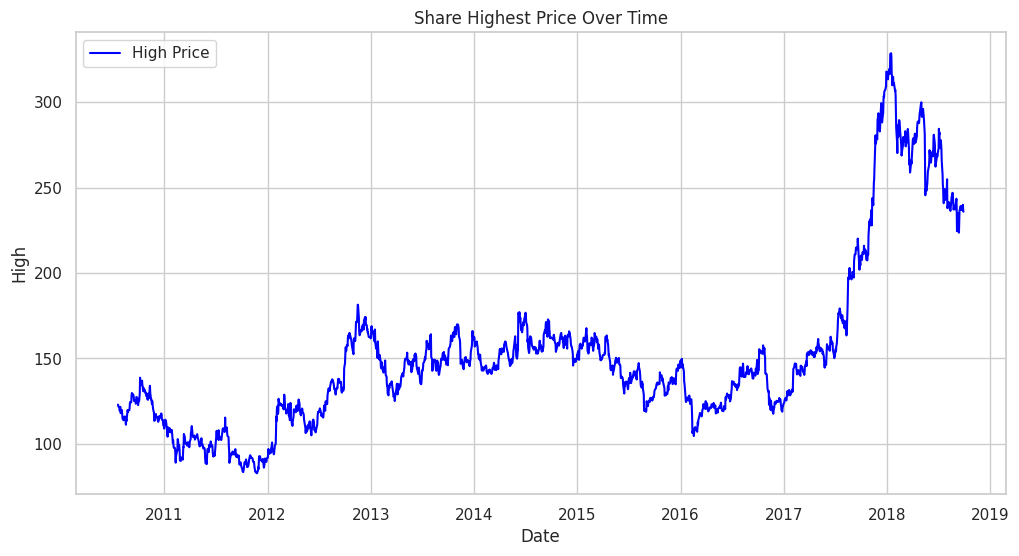

In [5]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

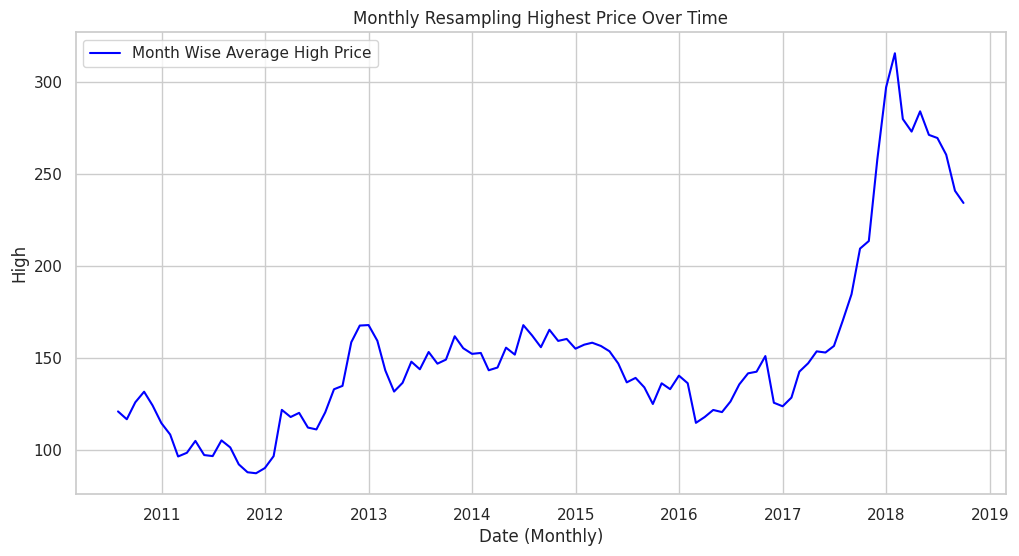

In [6]:
df_resampled = df.resample('ME').mean(numeric_only=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

'Date' is already the index or not present in the DataFrame.


<Figure size 1200x600 with 0 Axes>

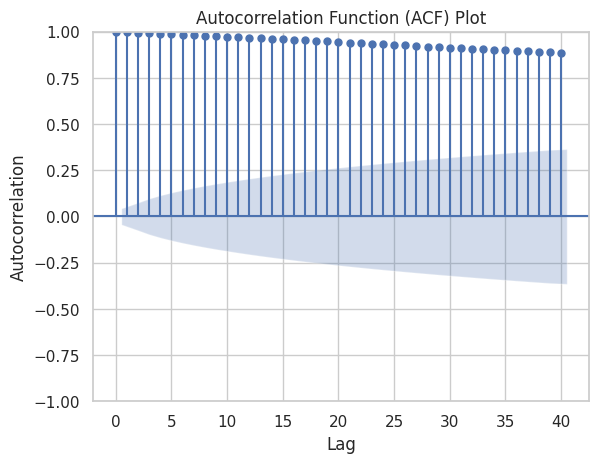

In [7]:
if 'Date' not in df.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plot_acf(df['High'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.9486787294896106
p-value: 0.3095187068477695
Critical Values: {'1%': np.float64(-3.4335754129266802), '5%': np.float64(-2.862964825335276), '10%': np.float64(-2.567528514159528)}


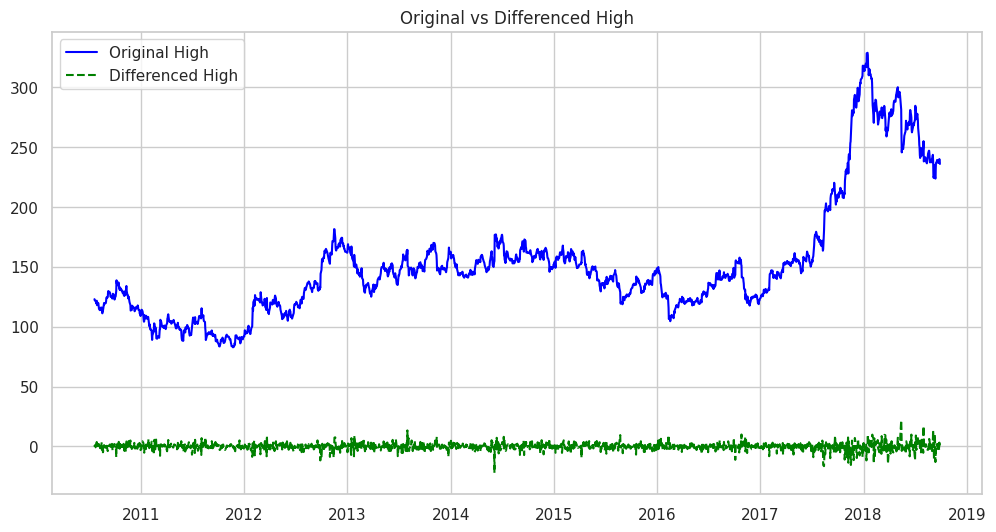

In [10]:
df['high_diff'] = df['High'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

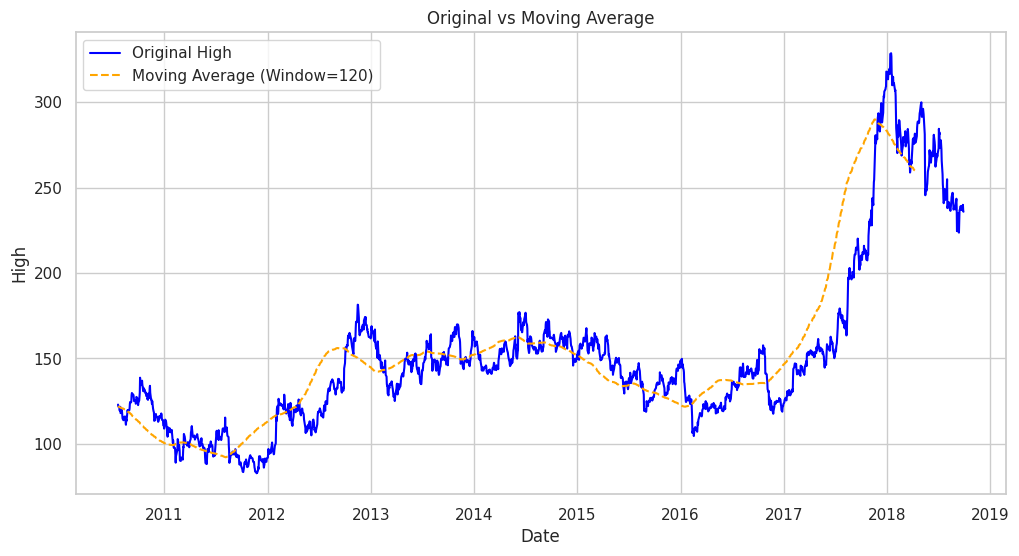

In [11]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [12]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

              High  high_diff
Date                         
2018-09-28  235.95        NaN
2018-09-27  236.80       0.85
2018-09-26  240.00       3.20
2018-09-25  236.75      -3.25
2018-09-24  239.20       2.45


In [13]:
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

,high_diff
Date,
2018-09-27,0.85
2018-09-26,3.20
2018-09-25,-3.25
2018-09-24,2.45
2018-09-21,-2.20


In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -22.45455398905239
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4335754129266802), '5%': np.float64(-2.862964825335276), '10%': np.float64(-2.567528514159528)}
